In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
import torch.nn as nn

In [2]:
# Download the MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

print("MNIST training set size:", len(mnist_trainset))
print("MNIST test set size:", len(mnist_testset))

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.32MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 121kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.4MB/s]

MNIST training set size: 60000
MNIST test set size: 10000


In [4]:
# Tạo Loader
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

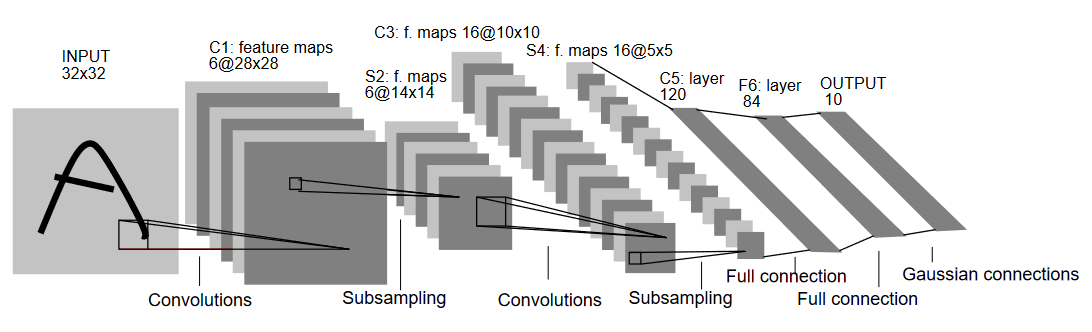

In [5]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Định nghĩa kiến trúc mô hình
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))

        x = x.view(-1, 16*4*4)

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
model = Model()
epochs = 10
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10] - Loss: 0.2864
Epoch [2/10] - Loss: 0.0822
Epoch [3/10] - Loss: 0.0582
Epoch [4/10] - Loss: 0.0470
Epoch [5/10] - Loss: 0.0384
Epoch [6/10] - Loss: 0.0328
Epoch [7/10] - Loss: 0.0271
Epoch [8/10] - Loss: 0.0237
Epoch [9/10] - Loss: 0.0202
Epoch [10/10] - Loss: 0.0178


In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 98.71%
